In [1]:
import numpy as np
from math import log
import matplotlib.pyplot as plt
import random as rnd

In [2]:
class LogisticRegressionModel():
    def __init__(self):
        self.w = np.random.rand(2)
        self.b = np.random.rand(1)[0]

    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))

    def predict(self, x):
        z = np.inner(self.w, x) + self.b
        a = self.sigmoid(z)
        return a

In [3]:
def train(X, Y, model, lr=0.1, iterations=10000):
    costs = []
    for i in range(iterations):
        dw = np.zeros(2)
        db = 0.0
        m = len(X)
        cost = 0.0
        for x, y in zip(X, Y):
            a = model.predict(x)
            if y == 1:
                cost -= log(a)
            else:
                cost -= log(1-a)
    
            dw += (a-y) * x
            db += (a-y)
    
        cost /= m
        model.w -= lr * dw/m
        model.b -= lr * db/m

        costs.append(cost)
    return costs

In [4]:
def plot_results(costs, title):
    plt.figure()
    for lr, cost in costs.items():
        plt.plot(range(len(cost)), cost, label=f'LR={lr}')
    plt.xlabel('Training Rounds')
    plt.ylabel('Cost')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{title}.png')

In [5]:
def output_predictions(X, model):
    predictions = []
    for x in X:
        pred = model.predict(x.reshape(1, -1))
        predictions.append(pred)
    return predictions

In [6]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_and = np.array([0, 0, 0, 1])  # AND
Y_or = np.array([0, 1, 1, 1])   # OR
Y_xor = np.array([0, 1, 1, 0])  # XOR

In [7]:
learning_rates = [0.01, 0.1, 1]

In [8]:
costs_and = {}
costs_or = {}
costs_xor = {}

In [9]:
for lr in learning_rates:
    model_and = LogisticRegressionModel()
    model_or = LogisticRegressionModel()
    model_xor = LogisticRegressionModel()

    costs_and[lr] = train(X, Y_and, model_and, lr)
    costs_or[lr] = train(X, Y_or, model_or, lr)
    costs_xor[lr] = train(X, Y_xor, model_xor, lr)

    print(f"Predictions for AND with LR={lr}: {output_predictions(X, model_and)}")
    print(f"Predictions for OR with LR={lr}: {output_predictions(X, model_or)}")
    print(f"Predictions for XOR with LR={lr}: {output_predictions(X, model_xor)}")
    print()

Predictions for AND with LR=0.01: [array([0.00795458]), array([0.14756461]), array([0.14783289]), array([0.78926316])]
Predictions for OR with LR=0.01: [array([0.18217747]), array([0.93006072]), array([0.92834835]), array([0.99870878])]
Predictions for XOR with LR=0.01: [array([0.50132785]), array([0.500165]), array([0.50025176]), array([0.4990889])]

Predictions for AND with LR=0.1: [array([1.23746045e-05]), array([0.02019967]), array([0.02019967]), array([0.97170829])]
Predictions for OR with LR=0.1: [array([0.02045294]), array([0.99183263]), array([0.99182983]), array([0.99999858])]
Predictions for XOR with LR=0.1: [array([0.5]), array([0.5]), array([0.5]), array([0.5])]

Predictions for AND with LR=1: [array([1.14873657e-08]), array([0.00201234]), array([0.00201234]), array([0.99718265])]
Predictions for OR with LR=1: [array([0.00201073]), array([0.99919582]), array([0.99919582]), array([1.])]
Predictions for XOR with LR=1: [array([0.5]), array([0.5]), array([0.5]), array([0.5])]



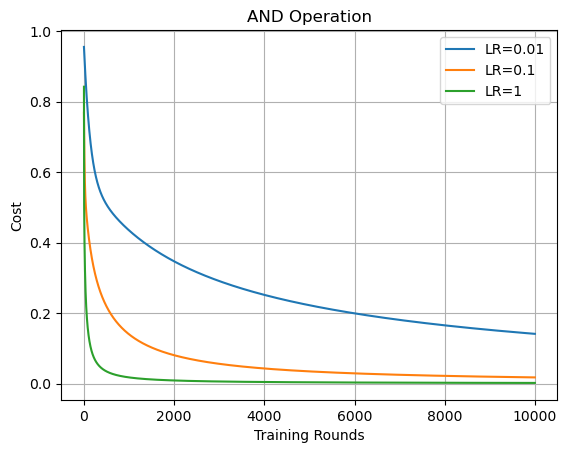

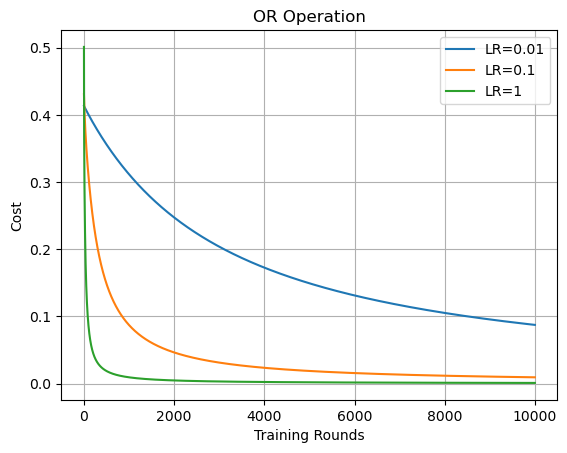

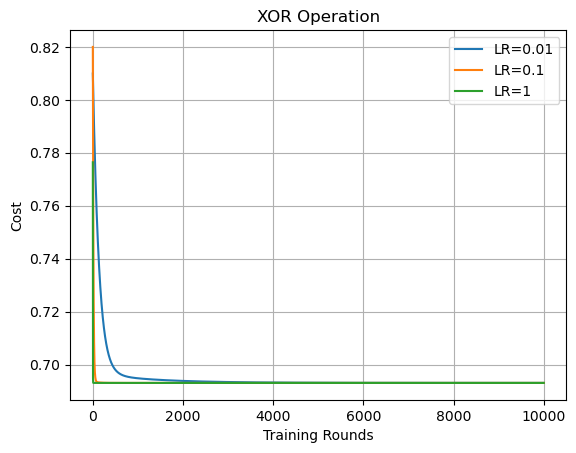

In [10]:
plot_results(costs_and, 'AND Operation')
plot_results(costs_or, 'OR Operation')
plot_results(costs_xor, 'XOR Operation')